Optimization

This class, Optimization, is the eighth of eight classes in the Machine Learning Foundations series. It builds upon the material from each of the other classes in the series -- on linear algebra, calculus, probability, statistics, and algorithms -- in order to provide a detailed introduction to training machine learning models.

Through the measured exposition of theory paired with interactive examples, you’ll develop a working understanding of all of the essential theory behind the ubiquitous gradient descent approach to optimization as well as how to apply it yourself — both at a granular, matrix operations level and a quick, abstract level — with TensorFlow and PyTorch. You’ll also learn about the latest optimizers, such as Adam and Nadam, that are widely-used for training deep neural networks.

Over the course of studying this topic, you'll:

Cette classe, intitulée "Optimisation", est la huitième sur huit dans la série des Fondements de l'Apprentissage Automatique. Elle s'appuie sur le contenu des autres classes de la série, portant sur l'algèbre linéaire, le calcul, la probabilité, les statistiques et les algorithmes, dans le but de fournir une introduction détaillée à l'entraînement des modèles d'apprentissage automatique.

À travers une exposition mesurée de la théorie associée à des exemples interactifs, vous développerez une compréhension pratique de toute la théorie essentielle derrière l'approche omniprésente de la descente de gradient pour l'optimisation, ainsi que la manière de l'appliquer vous-même, à la fois au niveau granulaire des opérations matricielles et à un niveau rapide et abstrait, en utilisant TensorFlow et PyTorch. Vous apprendrez également les derniers optimiseurs, tels que Adam et Nadam, largement utilisés pour l'entraînement des réseaux neuronaux profonds.

Au cours de l'étude de ce sujet, vous allez :

- Discover how the statistical and machine learning approaches to optimization differ, and why you would select one or the other for a given problem you’re solving.
- Découvrez comment les approches statistiques et d'apprentissage automatique en matière d'optimisation diffèrent, et pourquoi vous choisiriez l'une ou l'autre pour un problème donné que vous êtes en train de résoudre.
- Understand exactly how the extremely versatile (stochastic) gradient descent optimization algorithm works, including how to apply it
- Comprenez précisément comment fonctionne l'algorithme d'optimisation de la descente de gradient (stochastique), extrêmement polyvalent, y compris la manière de l'appliquer. 
- Get acquainted with the “fancy” optimizers that are available for advanced machine learning approaches (e.g., deep learning) and when you should consider using them.
- Familiarisez-vous avec les optimiseurs "sophistiqués" disponibles pour des approches avancées d'apprentissage automatique (par exemple, l'apprentissage profond) et déterminez quand vous devriez envisager de les utiliser.

Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's Machine Learning Foundations series, which offer detail on the following:

Notez que ce notebook Jupyter n'est pas destiné à être utilisé seul. Il constitue le code compagnon d'une conférence ou de vidéos de la série Fondements de l'Apprentissage Automatique de Jon Krohn, qui détaillent les éléments suivants :

Section 1: The Machine Learning Approach to Optimization:L'approche d'apprentissage automatique de l'optimisation

- The Statistical Approach to Regression: Ordinary Least Squares
- L'approche statistique de la régression : Moindres carrés ordinaires
- When Statistical Approaches to Optimization Break Down
- Quand les approches statistiques de l'optimisation montrent leurs limites
- The Machine Learning Solution
- La solution d'apprentissage automatique

Sectuon 2: Gradient Descent: Descente de gradient

- Objective Functions: Fonctions objectives
 
- Cost / Loss / Error Functions: Fonctions de coût / perte / erreur

- Minimizing Cost with Gradient Descent: Minimiser le coût avec la descente de gradient

- Learning Rate: Taux d'apprentissage

- Critical Points, incl. Saddle Points:Points critiques, y compris les points de selle
 
- Gradient Descent from Scratch with PyTorch:Descente de gradient à partir de zéro avec PyTorch 
 
- The Global Minimum and Local Minima: Le minimum global et les minima locaux

- Mini-Batches and Stochastic Gradient Descent (SGD): Mini-lots et descente de gradient stochastique (SGD)
 
- Learning Rate Scheduling: Ordonnancement du taux d'apprentissage
 
- Maximizing Reward with Gradient Ascent: Maximiser la récompense avec la montée de gradient


- Section 3: Fancy Deep Learning Optimizers: Optimiseurs sophistiqués pour l'apprentissage profond

- A Layer of Artificial Neurons in PyTorch:Une couche de neurones artificiels en PyTorch
- Jacobian Matrices: Matrices Jacobienne
- Hessian Matrices and Second-Order Optimization:Matrices Hessiennes et optimisation du second ordre
- Momentum:Momentum
- Nesterov Momentum:Momentum de Nesterov
- AdaGrad:AdaGrad
- AdaDelta: AdaDelta
- RMSProp:RMSProp
- Adam:Adam
- Nadam:Nadam
- Training a Deep Neural Net:Entraînement d'un réseau neuronal profond
- Resources for Further Study:Ressources pour approfondir l'étude

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Section 1: Optimization Approaches: Approches de l'optimisation
Refer to the slides and the Ordinary Least Squares section of the Intro to Stats notebook.
 
Reportez-vous aux diapositives et à la section des moindres carrés ordinaires du cahier d'introduction aux statistiques.

- Section 2: Gradient Descent: descente de gradient
- Cost Functions: Fonctions de coût

- Fundamentally, for some instance $i$ , we'd like to quantify the difference between the "correct" target model output $y_{i}$ and the model's predicted output $\hat{y_{i}}$. A first idea might be to take the simple difference:

- Fondamentalement, pour une instance donnée $i$, nous aimerions quantifier la différence entre la sortie modèle cible "correcte" et la sortie prédite du modèle $\hat{y_{i}}$. Une première idée pourrait être de prendre la différence simple :
$$\Delta y_{i}= \hat{y_{i}}-y_{i}$$

For computational efficiency (we'll explore this later in the segment), in ML we seldom consider the cost associated with a single instance $i$. Instead, we typically consider several instances simultaneously, in which case calculating the simple difference is largely ineffective because positive and negative $\Delta y_{i}$ values cancel out. E.g., consider a situation where:

Pour des raisons d'efficacité computationnelle (nous explorerons cela plus tard dans le segment), en apprentissage automatique, nous considérons rarement le coût associé à une seule instance $i$. Au lieu de cela, nous considérons généralement plusieurs instances simultanément, auquel cas le calcul de la simple différence est largement inefficace car les valeurs positives et négatives de $\Delta y_{i}$ s'annulent mutuellement. Par exemple, considérez une situation où :
$$\Delta y_{1}= \hat{y_{1}}-y_{1}=7-2=5$$
$$\Delta y_{2}= \hat{y_{2}}-y_{2}=3-8=-5$$

On an individual-instance basis, there are differences between the predicted and target outputs, indicating the model could be improved. Despite this, the total cost ($\sum \Delta y_{i}=\Delta y_{1}+\Delta y_{2}=5-5$) is zero and therefore the mean cost ($\dfrac{\sum \Delta y_{i}}{n}=\dfrac{0}{n}$) is also zero, erroneously implying a perfect model fit.

À l'échelle individuelle, il y a des différences entre les sorties prédites et cibles, indiquant que le modèle pourrait être amélioré. Malgré cela, le coût total ($\sum \Delta y_{i}=\Delta y_{1}+\Delta y_{2}=5-5$) est nul, et par conséquent, le coût moyen ($\dfrac{\sum \Delta y_{i}}{n}=\dfrac{0}{n}$) est également nul, ce qui implique de manière erronée un. ajustement parfait du modèle.


Mean Squared Error : Erreur quadratique moyenne
While MAE satisfactorily quantifies cost across multiple instances, for reasons we'll numerate in a moment, it is much more common in ML to use mean squared error (MSE).

Let's use the contrived values again to show how MSE is calculated. As covered in Calculus II, the individual-instance variant of MSE is squared error or quadratic cost, which -- as with absolute error -- dictates that the cost for each instance $i$ must be $\geq 0$:


Bien que l'erreur absolue moyenne (MAE) quantifie de manière satisfaisante le coût à travers plusieurs instances, pour des raisons que nous énumérerons dans un instant, il est beaucoup plus courant en apprentissage automatique d'utiliser l'erreur quadratique moyenne (MSE).

Utilisons à nouveau les valeurs fabriquées pour montrer comment le MSE est calculé. Comme abordé dans le Calcul II, la variante individuelle du MSE est l'erreur au carré ou le coût quadratique, qui - tout comme l'erreur absolue - stipule que le coût pour chaque instance $i$ doit être $\geq 0$ :

- $$ (\hat{y_{1}}-y_{1})^{2}=(7-2)^{2}=25$$
- $$ (\hat{y_{2}}-y_{2})^{2}=(3-8)^{2}=25$$

As suggested by its name, MSE is the average: 
Comme son nom l'indique, le MSE est la moyenne :

$$C=\dfrac{1}{n}\sum_{i=1}^{n}(\hat{y_{i}}-y_{i})^{2}=\dfrac{1}{2}(25+25)=25$$

Since cost for each instance $i$ must be $\geq 0$ , MSE (as with MAE) must therefore also be $\geq 0$. 
Étant donné que le coût pour chaque instance $i$ doit être $\geq 0$, le MSE (comme le MAE) doit donc également être $\geq 0$. 
In addition: De plus 

- The partial derivative of the MSE $C$ can be efficiently computed w.r.t. model parameters, providing a gradient of cost, $\nabla{C} $ (the primary focus of Calculus II is deriving  $\nabla{C} $). Adjusting model parameters, we can descend  $\nabla{C} $ and thereby minimize $ C $ (the mechanics of which are the primary focus of Optimization).

- La dérivée partielle du MSE $C$ peut être calculée efficacement par rapport aux paramètres du modèle, fournissant un gradient du coût, $\nabla{C} $ (le principal objet d'étude du Calcul II est de dériver $\nabla{C} $). En ajustant les paramètres du modèle, nous pouvons descendre le gradient $\nabla{C} $ et ainsi minimiser $ C $ (dont les mécanismes sont l'objet principal de l'Optimisation).

- Compared to MAE, MSE is relatively tolerant of small $\Delta y_{i}$ and intolerant of large $\Delta y_{i}$, a characteristic that tends to lead to better-fitting models.
- Par rapport à l'erreur absolue moyenne (MAE), l'erreur quadratique moyenne (MSE) est relativement tolérante envers de petites valeurs de $\Delta y_{i}$ et intolérante envers de grandes valeurs de $\Delta y_{i}$, une caractéristique qui tend à conduire à des modèles mieux ajustés.



In [2]:
delta_y = np.linspace(-5, 5, 1000)

In [3]:
abs_error = np.abs(delta_y)

In [4]:
sq_error = delta_y**2

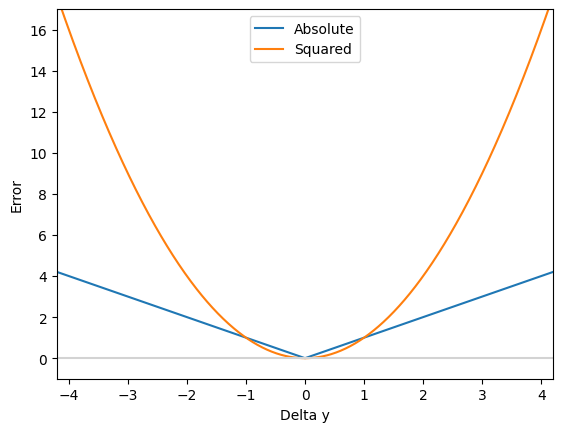

In [5]:
fig, ax = plt.subplots()

plt.plot(delta_y, abs_error)
plt.plot(delta_y, sq_error)
ax.axhline(c='lightgray')

plt.xlabel('Delta y')
plt.ylabel('Error')

ax.set_xlim(-4.2, 4.2)
ax.set_ylim(-1, 17)
_ = ax.legend(['Absolute', 'Squared'])

here are other cost functions out there (e.g., cross-entropy cost is the typical choice for a deep learning classifier), but since MSE is the most common, including being the default option for regression models, it will be our focus for the remainder of ML Foundations.

Il existe d'autres fonctions de coût disponibles (par exemple, la fonction de coût de l'entropie croisée est le choix typique pour un classificateur d'apprentissage profond), mais comme l'erreur quadratique moyenne (MSE) est la plus courante, y compris en tant qu'option par défaut pour les modèles de régression, elle sera notre centre d'attention pour le reste des Fondements de l'Apprentissage Automatique.

Minimizing Cost with Gradient Descent: Minimiser le coût avec la descente de gradient
Critical Points: points critiques
Minimum: Minimum


In [6]:
x = np.linspace(-10, 10, 1000)

if $y=x^2+3x+4$ alors $y'=2x+3$ Critical point is located where $y'=0$
, so where $y'=2x+3=0$ so $x=-1.5$ At which point, $y=1.75$ for $x=-1.75$ Thus, the critical point is located at (-1.5, 1.75).

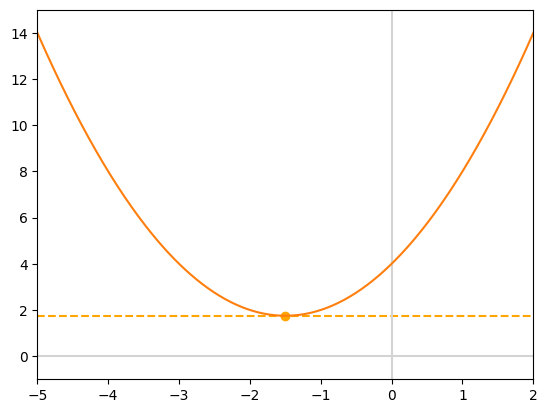

In [11]:
fig, ax = plt.subplots()

plt.scatter(-1.5, 1.75, c='orange')
plt.axhline(y=1.75, c='orange', linestyle='--')

plt.axvline(x=0, c='lightgray')
plt.axhline(y=0, c='lightgray')
xx = np.linspace(-10, 10, 1000)
yy=xx**2+3*xx+4
ax.set_xlim(-5, 2)
ax.set_ylim(-1, 15)
x=-1.5
y_min=1.75
_ = ax.plot(x, y_min)
_ = ax.plot(xx, yy)


Maximum
if $y=-x^2+3x+4$ alors $y'=-2x+3$ Critical point is located where $y'=0$
, so where $y'=-2x+3=0$ so $x=1.5$ At which point, $y=6.25$ for $x=1.5$ Thus, the critical point is located at (1.5, 6.25).

In [12]:
y_max = -x**2 + 3*x + 4

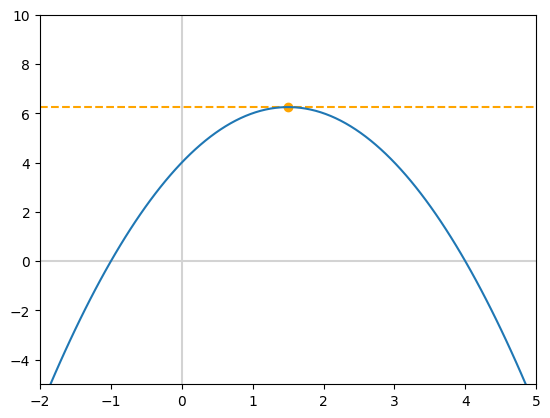

In [15]:
fig, ax = plt.subplots()

plt.scatter(1.5, 6.25, c='orange')
plt.axhline(y=6.25, c='orange', linestyle='--')

plt.axvline(x=0, c='lightgray')
plt.axhline(y=0, c='lightgray')
x=np.linspace(-2,5,100)
y_max = -x**2 + 3*x + 4
ax.set_xlim(-2, 5)
ax.set_ylim(-5, 10)

_ = ax.plot(x, y_max)

Saddle point
if $y=x^3+6$ alors $y'=3x^2$ Critical point is located where $y'=0$
, so where $y'=3x^2=0$ so $x=0$ At which point, $y=6$ for $x=0$ Thus, the critical point is located at (0, 6).

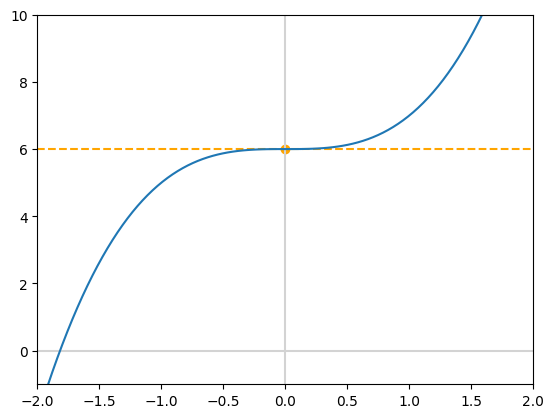

In [16]:
fig, ax = plt.subplots()

plt.scatter(0, 6, c='orange')
plt.axhline(y=6, c='orange', linestyle='--')

plt.axvline(x=0, c='lightgray')
plt.axhline(y=0, c='lightgray')
x=np.linspace(-2,2,100)
y_sp = x**3 + 6
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 10)

_ = ax.plot(x, y_sp)

Gradient Descent from Scratch:Descente de gradient à partir de zéro

This notebook is similar to the Batch Regression Gradient notebook with the critical exception that we optimize via gradient descent without relying on the built-in PyTorch SGD() optimizer.

Ce cahier est similaire au cahier sur la régression par lots avec l'exception cruciale que nous optimisons via la descente de gradient sans nous appuyer sur l'optimiseur intégré SGD() de PyTorch.

In [17]:
import torch
import matplotlib.pyplot as plt

In [18]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

In [19]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [20]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

Step 1: Forward pass: Étape 1 : Passage avant


In [21]:
yhats = regression(xs, m, b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

Step 2: Compare $\hat{y}$ with true $y$ to calculate cost $ C $

Étape 2 : Comparer $\hat{y}$ avec le vrai $y$ pour calculer le coût $ C $

Mean squared error: Erreur quadratique moyenne :

$$C=\dfrac{1}{n}\sum_{i=1}^{n}(\hat{y_{i}}-y_{i})^{2}$$



In [22]:
def mse(my_yhat, my_y): 
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [23]:
C = mse(yhats, ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

Step 3: Use autodiff to calculate gradient of $C$ w.r.t. parameters

Étape 3 : Utiliser l'autodiffusion pour calculer le gradient de $C$ par rapport aux paramètres

In [24]:
C.backward()

In [25]:
m.grad

tensor([36.3050])

$\dfrac{\partial C}{\partial m}=36.3050$  indicates that an increase in $m$ corresponds to a large increase in $C$

$\dfrac{\partial C}{\partial m}=36.3050$ indique qu'une augmentation de $m$ correspond à une augmentation importante de $C$.

In [26]:
b.grad

tensor([6.2650])

Meanwhile, $\dfrac{\partial C}{\partial b}=6.2650$  indicates that an increase in $b$ also corresponds to an increase in $C$, though much less so than $m$.

Pendant ce temps, $\dfrac{\partial C}{\partial b}=6.2650$ indique qu'une augmentation de $b$ correspond également à une augmentation de $C$, bien que beaucoup moins prononcée que pour $m$.

(Using partial derivatives derived in Calculus II, we could alternatively calculate these same slopes without automatic numerical computation:)
(En utilisant les dérivées partielles dérivées du Calcul II, nous pourrions également calculer ces mêmes pentes sans le calcul numérique automatique :) 
$\hat{y_{i}}=m*x_{i} + b$

$$ \dfrac{\partial C}{\partial m}=\dfrac{2}{n}\sum_{i=1}^{n}(\hat{y_{i}}-y_{i}) x_{i}$$
$$ \dfrac{\partial C}{\partial b}=\dfrac{2}{n}\sum_{i=1}^{n}(\hat{y_{i}}-y_{i}) $$


In [27]:
2*1/len(ys)*torch.sum((yhats - ys)*xs)

tensor(36.3050, grad_fn=<MulBackward0>)

In [28]:
#$$ \dfrac{\partial C}{\partial b}=\dfrac{2}{n}\sum_{i=1}^{n}(\hat{y_{i}}-y_{i}) $$
2*1/len(ys)*torch.sum(yhats - ys)

tensor(6.2650, grad_fn=<MulBackward0>)

The gradient of cost $\nabla{C}=(\dfrac{\partial C}{\partial b},\dfrac{\partial C}{\partial m})^{T}$ is

In [29]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 6.2650],
        [36.3050]])

For convenience, model parameters are often denoted as $\theta$ , which, depending on the model, could be, for example, a vector, a matrix, or a collection of tensors of varying dimensions. With our simple linear model, a vector tensor will do:

Pour plus de commodité, les paramètres du modèle sont souvent notés $\theta$, qui, en fonction du modèle, pourraient être, par exemple, un vecteur, une matrice ou une collection de tenseurs de dimensions variées. Avec notre modèle linéaire simple, un tenseur de type vecteur fera l'affaire :

In [31]:
#m = torch.tensor([0.9]).requires_grad_()
#b = torch.tensor([0.1]).requires_grad_()
theta = torch.tensor([[b, m]]).T 
theta

tensor([[0.1000],
        [0.9000]])

Note the gradient $\nabla{C}$ could thus alternatively be denoted with respect to $ \theta$
as $\nabla_{\theta}{f(\theta)}$

Notez que le gradient $\nabla{C}$ pourrait ainsi être alternativement noté par rapport à $ \theta$ comme $\nabla_{\theta}{f(\theta)}$


(Also, note that we're transposing $ \theta$ to make forthcoming tensor operations easier because of the convention in ML to transpose the gradient, $\nabla{C}$.)

(De plus, notez que nous effectuons une transposition de $ \theta$ pour faciliter les opérations de tenseurs à venir en raison de la convention en apprentissage automatique de transposer le gradient, $\nabla{C}$).

Let's visualize the state of the most pertinent metrics in a single plot:

Visualisons l'état des métriques les plus pertinentes dans un seul graphique :

In [32]:
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):
    
    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        xlabel = 'm = {}'.format('%.3g' % my_m.item())        
        ylabel = 'b = {}'.format('%.3g' % my_b.item())
    
    fig, ax = plt.subplots()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().numpy()
    y_max = regression(x_max, my_m, my_b).detach().numpy()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

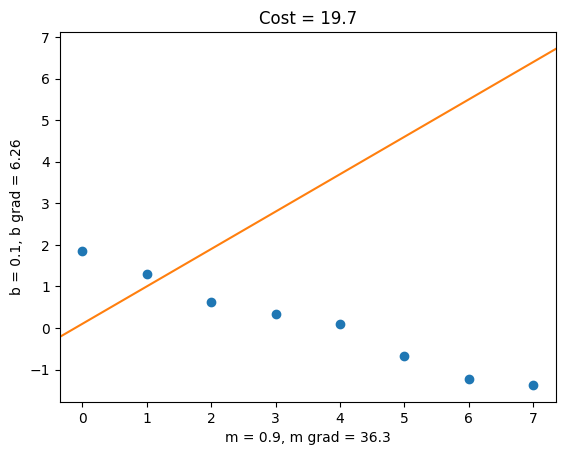

In [33]:
labeled_regression_plot(xs, ys, m, b, C)

Step 4: Gradient descent : Étape 4 : Descente de gradient
In the first round of training, with $\dfrac{\partial C}{\partial m}=36.3$ and $\dfrac{\partial C}{\partial b}=6.26$, the lowest hanging fruit with respect to reducing cost $C$ is to decrease the slope of the regression line $m$,. The model would also benefit from a comparatively small decrease in the $y$ -intercept of the line, $b$.


Dans la première itération d'entraînement, avec $\dfrac{\partial C}{\partial m}=36.3$ et $\dfrac{\partial C}{\partial b}=6.26$, le moyen le plus simple de réduire le coût $C$ est de diminuer la pente de la ligne de régression $m$. Le modèle bénéficierait également d'une diminution relativement faible de l'ordonnée à l'origine de la ligne, $b$.

To control exactly how much we adjust the model parameters $\theta$, we set a learning rate, a hyperparameter of ML models that use gradient descent (that is typically denoted with $\alpha$:)

Pour contrôler précisément la quantité d'ajustement des paramètres du modèle $\theta$, nous définissons un taux d'apprentissage, un hyperparamètre des modèles d'apprentissage automatique qui utilisent la descente de gradient (généralement noté $\alpha$) :

In [34]:
lr = 0.01 # Cover rules of thumb:Exposer des règles empiriques

We use the learning rate $\alpha$ to scale the gradient, i.e $\alpha \nabla{C}$

Nous utilisons le taux d'apprentissage $\alpha$ pour mettre à l'échelle le gradient, c'est-à-dire $\alpha \nabla{C}$.

In [35]:
scaled_gradient = lr * gradient
scaled_gradient

tensor([[0.0626],
        [0.3630]])

We can now use our scaled gradient to adjust our model parameters $\theta$ in directions that will reduce the model cost $C$.

Since, e.g., $\dfrac{\partial C}{\partial m}=36.3$ indicates that increasing the slope parameter $m$ corresponds to an increase in cost $C$, we subtract the gradient to adjust each individual parameter in a direction that reduces cost:

Nous pouvons maintenant utiliser notre gradient mis à l'échelle pour ajuster nos paramètres de modèle $\theta$ dans des directions qui réduiront le coût du modèle $C$.

Puisque, par exemple, $\dfrac{\partial C}{\partial m}=36.3$ indique qu'une augmentation du paramètre de pente $m$ correspond à une augmentation du coût $C$, nous soustrayons le gradient pour ajuster chaque paramètre individuel dans une direction qui réduit le coût :

$$\theta'=\theta - \alpha \nabla{C}$$

In [36]:
new_theta = theta - scaled_gradient
new_theta

tensor([[0.0374],
        [0.5369]])


To see these adjustments even more clearly, you can consider each parameter individually, e.g

Pour voir ces ajustements de manière encore plus claire, vous pouvez considérer chaque paramètre individuellement, par exemple :
$$m'=m - \alpha \dfrac{\partial C}{\partial m}$$ 
and
$$b'=b - \alpha \dfrac{\partial C}{\partial b}$$ 

In [37]:
m - lr*m.grad

tensor([0.5369], grad_fn=<SubBackward0>)

In [38]:
b - lr*b.grad

tensor([0.0374], grad_fn=<SubBackward0>)

With our updated parameters $\theta$ now in hand, we can use them to check that they do indeed correspond to a decreased cost $C$ :

Avec nos paramètres $\theta$ mis à jour maintenant en main, nous pouvons les utiliser pour vérifier qu'ils correspondent effectivement à un coût réduit $C$ :

In [39]:
b = new_theta[0]
m = new_theta[1]

In [40]:
C = mse(regression(xs, m, b), ys)

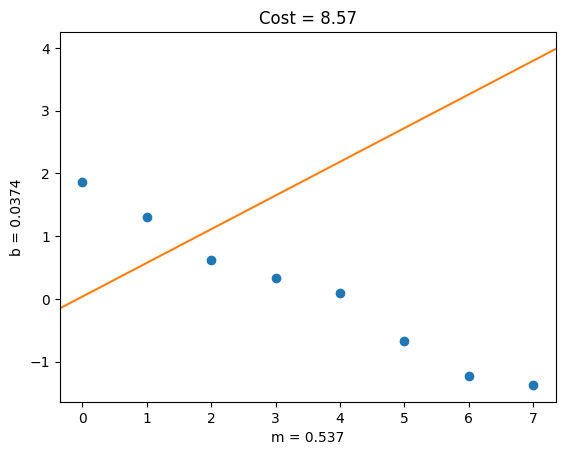

In [41]:
labeled_regression_plot(xs, ys, m, b, C, include_grad=False) 
# Gradient of C hasn't been recalculated:Le gradient de $C$ n'a pas été recalculé.

Rinse and Repeat
To perform another round of gradient descent, we let PyTorch know we'd like to track gradients on the tensors b and m (as we did at the top of the notebook when we created them the first time):

Rincez et répétez
Pour effectuer une autre itération de la descente de gradient, informons PyTorch que nous souhaitons suivre les gradients sur les tenseurs b et m (comme nous l'avons fait en haut du cahier lorsque nous les avons créés pour la première fois) :

In [42]:
b.requires_grad_()
_ = m.requires_grad_() 
# "_ =" is to prevent output within Jupyter; it is cosmetic only
# "_ =" est utilisé pour éviter l'affichage dans Jupyter ; c'est purement esthétique

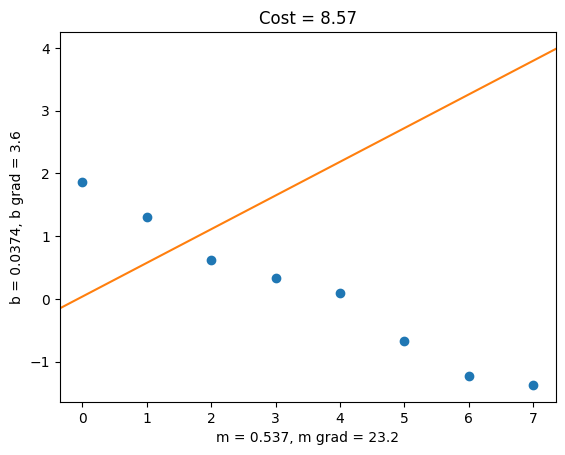

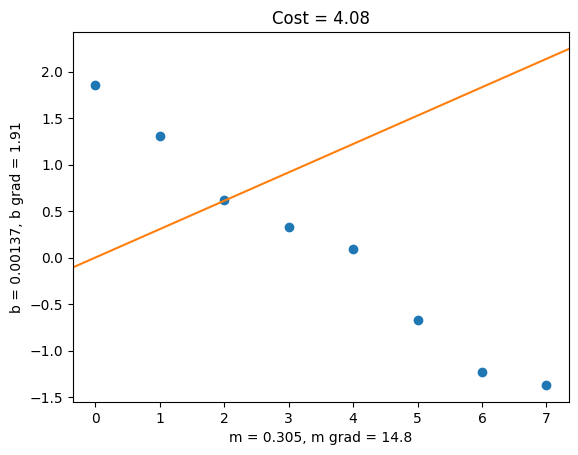

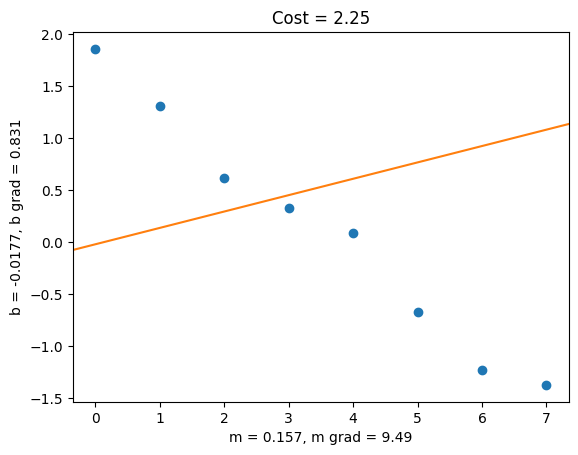

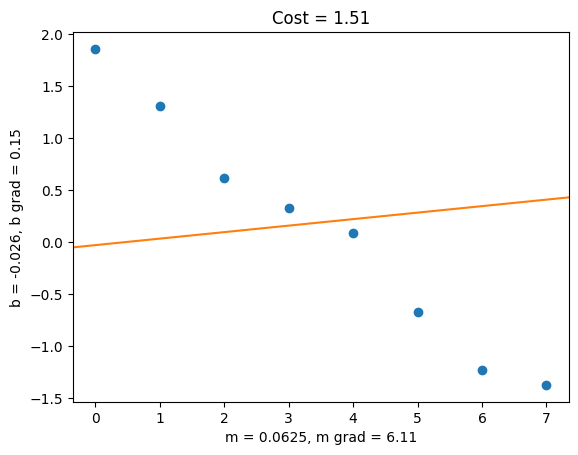

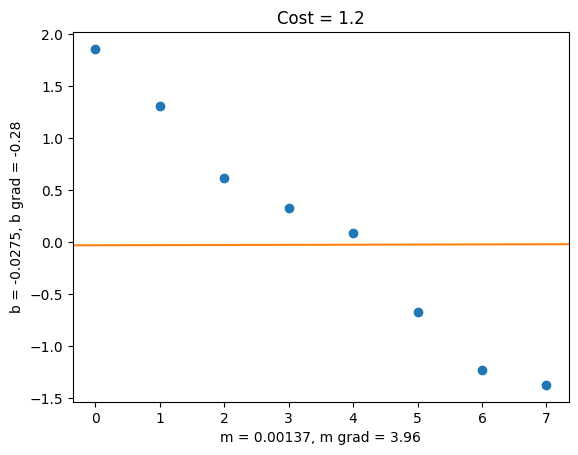

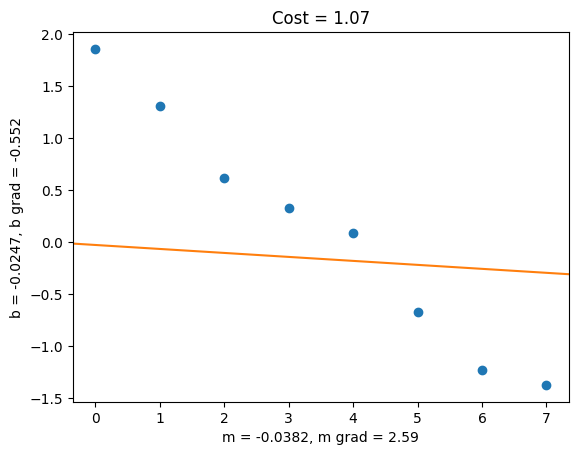

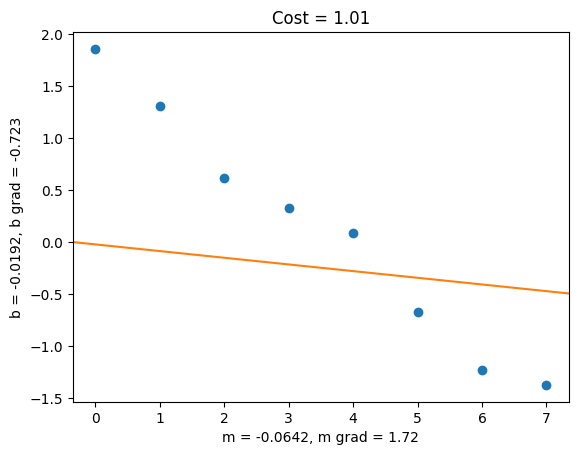

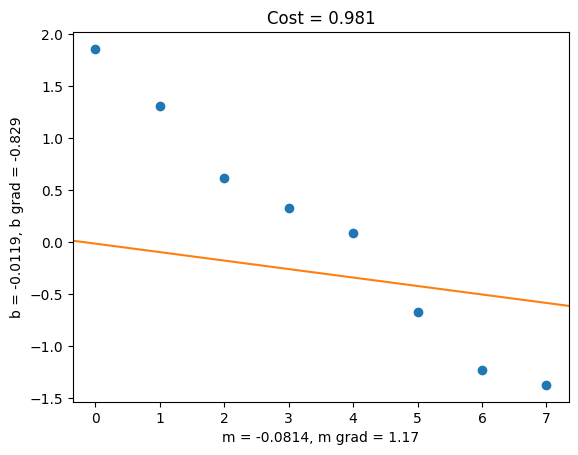

In [43]:
epochs = 8
for epoch in range(epochs): 
    
    yhats = regression(xs, m, b) # Step 1
    C = mse(yhats, ys) # Step 2
    
    C.backward() # Step 3
    
    labeled_regression_plot(xs, ys, m, b, C)
    
    gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
    theta = torch.tensor([[b, m]]).T 
    
    new_theta = theta - lr*gradient # Step 4
    
    b = new_theta[0].requires_grad_()
    m = new_theta[1].requires_grad_()

(Note that the above plots are identical to those in the Batch Regression Gradient notebook, in which we used the PyTorch SGD() method to descend the gradient.)

(Notez que les graphiques ci-dessus sont identiques à ceux du cahier sur la descente de gradient par lots, dans lequel nous avons utilisé la méthode PyTorch SGD() pour descendre le gradient.)

In later rounds of training, after the model's slope $m$
 has become closer to the slope represented by the data, $\dfrac{\partial C}{\partial b}$ becomes negative, indicating an inverse relationship between $b$ and $C$. Meanwhile, $\dfrac{\partial C}{\partial m}$ remains positive.

 Dans les itérations ultérieures de l'entraînement, après que la pente du modèle $m$ se rapproche de la pente représentée par les données, $\dfrac{\partial C}{\partial b}$ devient négatif, indiquant une relation inverse entre $b$ et $C$. Pendant ce temps, $\dfrac{\partial C}{\partial m}$ reste positif.

This combination directs gradient descent to simultaneously adjust the $y$ -intercept $b$ upwards and the slope $m$ downwards in order to reduce cost $C$ and, ultimately, fit the regression line snugly to the data.

Cette combinaison dirige la descente de gradient pour ajuster simultanément l'ordonnée à l'origine $b$ vers le haut et la pente $m$ vers le bas afin de réduire le coût $C$ et, finalement, d'ajuster la ligne de régression de manière étroite aux données.

Finally, let's run a thousand more epochs (without plots) to converge on optimal parameters $\theta$:

Enfin, exécutons mille époques supplémentaires (sans graphiques) pour converger vers les paramètres optimaux $\theta$ :

In [44]:
epochs = 992 # accounts for rounds above to match 1000 epochs of regression-in-pytorch.ipynb
for epoch in range(epochs):
    
    yhats = regression(xs, m, b) # Step 1
    C = mse(yhats, ys) # Step 2
    
    C.backward() # Step 3
    
    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))
    
    gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
    theta = torch.tensor([[b, m]]).T 
    
    new_theta = theta - lr*gradient # Step 4
    
    b = new_theta[0].requires_grad_()
    m = new_theta[1].requires_grad_()

Epoch 0, cost 0.962, m grad 0.82, b grad -0.894
Epoch 1, cost 0.948, m grad 0.595, b grad -0.934
Epoch 2, cost 0.936, m grad 0.452, b grad -0.957
Epoch 3, cost 0.925, m grad 0.361, b grad -0.969
Epoch 4, cost 0.915, m grad 0.302, b grad -0.975
Epoch 5, cost 0.904, m grad 0.265, b grad -0.977
Epoch 6, cost 0.894, m grad 0.241, b grad -0.976
Epoch 7, cost 0.884, m grad 0.225, b grad -0.973
Epoch 8, cost 0.874, m grad 0.214, b grad -0.969
Epoch 9, cost 0.864, m grad 0.207, b grad -0.965
Epoch 10, cost 0.854, m grad 0.202, b grad -0.96
Epoch 11, cost 0.845, m grad 0.199, b grad -0.955
Epoch 12, cost 0.835, m grad 0.196, b grad -0.95
Epoch 13, cost 0.826, m grad 0.194, b grad -0.945
Epoch 14, cost 0.817, m grad 0.192, b grad -0.939
Epoch 15, cost 0.808, m grad 0.191, b grad -0.934
Epoch 16, cost 0.799, m grad 0.189, b grad -0.929
Epoch 17, cost 0.79, m grad 0.188, b grad -0.923
Epoch 18, cost 0.781, m grad 0.187, b grad -0.918
Epoch 19, cost 0.772, m grad 0.186, b grad -0.913
Epoch 20, cost

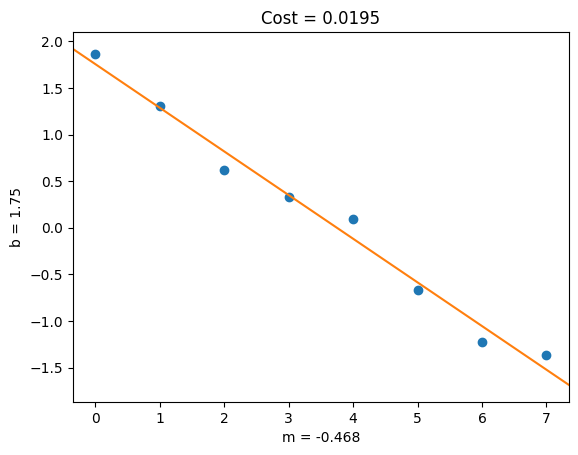

In [45]:
labeled_regression_plot(xs, ys, m, b, C, include_grad=False)

Stochastic Gradient Descent from Scratch: "Descente de Gradient Stochastique à partir de Zéro"

This notebook expands the upon the Gradient Descent from Scratch notebook to introduce stochastic gradient descent (SGD).

"Carnet d'exercices étendant le carnet sur la Descente de Gradient à partir de Zéro pour introduire la descente de gradient stochastique (SGD)."

In [46]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [47]:
torch.manual_seed(42)
np.random.seed(42)

Simulate data
Create a vector tensor x with eight million points spaced evenly from zero to eight:

"Simuler des données
Créer un tenseur vectoriel x avec huit millions de points répartis uniformément de zéro à huit :"

In [48]:
n = 8000000

In [49]:
x = torch.linspace(0., 8., n) # using typical 'x' convention for vector instead of 'xs'

Use the same line equation as in the Regression in PyTorch notebook to simulate eight million $y$ values for the vector y. That is, $m=-0.5 $
 and $b=2 $ :

 $$y=m*x+b+\epsilon =-0.5*x+2+\mathcal{N}(0,1)$$

In [50]:
y = -0.5*x + 2 + torch.normal(mean=torch.zeros(n), std=1) # 'y' vector instead of 'ys'

Let's randomly sample a couple thousand points for the purpose of data visualization:
"Procédons à l'échantillonnage aléatoire de quelques milliers de points à des fins de visualisation des données :"

In [51]:
indices = np.random.choice(n, size=2000, replace=False)

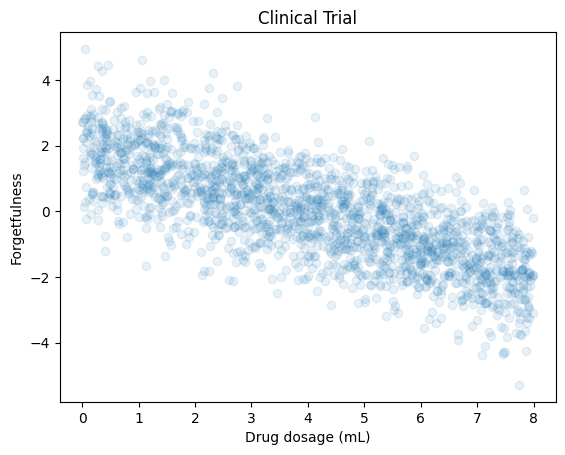

In [52]:
fig, ax = plt.subplots()
plt.title("Clinical trial:Essai Clinique")
plt.xlabel("Drug dosage (mL):Dosage du médicamen")
plt.ylabel("Forgetfulness:Oubli")
_ = ax.scatter(x[indices], y[indices], alpha=0.1)

Define model and "randomly" initialize model parameters
Définir le modèle et initialiser "de manière aléatoire" les paramètres du modèle.

In [53]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [54]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

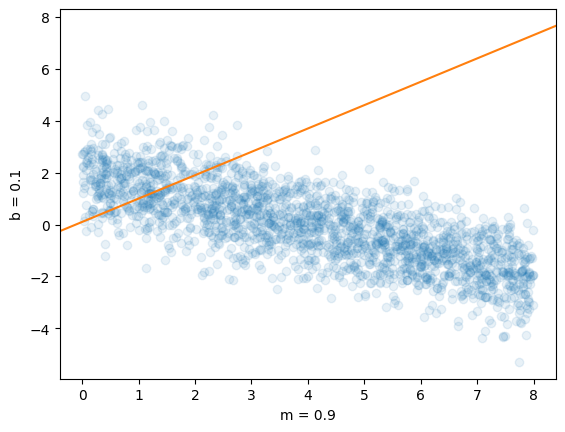

In [56]:
fig, ax = plt.subplots()

ax.scatter(x[indices], y[indices], alpha=0.1)

x_min, x_max = ax.get_xlim()
y_min = regression(x_min, m, b).detach().numpy()
y_max = regression(x_max, m, b).detach().numpy()

plt.ylabel('b = {}'.format('%.3g' % b.item()))
plt.xlabel('m = {}'.format('%.3g' % m.item()))

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

Optimize parameters via SGD
Randomly (stochastically) sample a mini-batch of data for gradient descent:
Optimiser les paramètres via la SGD
Échantillonner de manière aléatoire (stochastique) une mini-batch de données pour la descente de gradient :

In [57]:
batch_size = 32 # model hyperparameter

Sample without replacement. If you run out of data (which we won't in this example because we'll do 100 rounds of training so use 3200 data points, 0.04% of the 8m), commence another epoch with the full complement of data (we'll cover this in later NBs).

Échantillonner sans remplacement. Si vous épuisez les données (ce qui ne sera pas le cas dans cet exemple car nous effectuerons 100 cycles d'entraînement en utilisant 3200 points de données, soit 0,04 % des 8 millions), démarrez un autre épisode avec l'ensemble complet de données (nous aborderons cela dans des carnets ultérieurs).

In [58]:
batch_indices = np.random.choice(n, size=batch_size, replace=False)

In [59]:
x[batch_indices]

tensor([7.2894, 3.4176, 4.5081, 4.0586, 4.2343, 0.7974, 2.4974, 6.3466, 4.6832,
        7.6599, 5.1981, 1.7992, 1.1342, 6.7925, 5.6772, 6.2090, 7.1356, 7.6577,
        4.8597, 7.0404, 7.9052, 1.5491, 6.3357, 5.8022, 1.9294, 3.2062, 5.1424,
        4.9199, 1.9978, 1.1224, 2.1819, 0.2313])

In [60]:
len(x[batch_indices])

32

Other than sampling a mini-batch, we optimize by following identical steps to those in the Gradient Descent from Scratch notebook:
Outre l'échantillonnage d'une mini-batch, nous optimisons en suivant des étapes identiques à celles du carnet sur la Descente de Gradient à partir de Zéro :

Step 1: Forward pass: Étape 1 : Passe avant

In [61]:
yhat = regression(x[batch_indices], m, b)
yhat

tensor([6.6605, 3.1759, 4.1573, 3.7528, 3.9109, 0.8176, 2.3477, 5.8119, 4.3149,
        6.9939, 4.7783, 1.7193, 1.1208, 6.2132, 5.2095, 5.6881, 6.5220, 6.9919,
        4.4737, 6.4363, 7.2147, 1.4942, 5.8021, 5.3220, 1.8364, 2.9856, 4.7282,
        4.5279, 1.8980, 1.1101, 2.0637, 0.3082], grad_fn=<AddBackward0>)

Step 2: Compare $\hat{y}$ with true $y$ to calculate cost $C$

Étape 2 : Comparer $\hat{y}$ avec le vrai $y$ pour calculer le coût $C$

In [62]:
def mse(my_yhat, my_y): 
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [63]:
C = mse(yhat, y[batch_indices])
C

tensor(30.6121, grad_fn=<DivBackward0>)

In [66]:
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):
    
    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        xlabel = 'm = {}'.format('%.3g' % my_m.item())        
        ylabel = 'b = {}'.format('%.3g' % my_b.item())
    
    fig, ax = plt.subplots()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().numpy()
    y_max = regression(x_max, my_m, my_b).detach().numpy()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

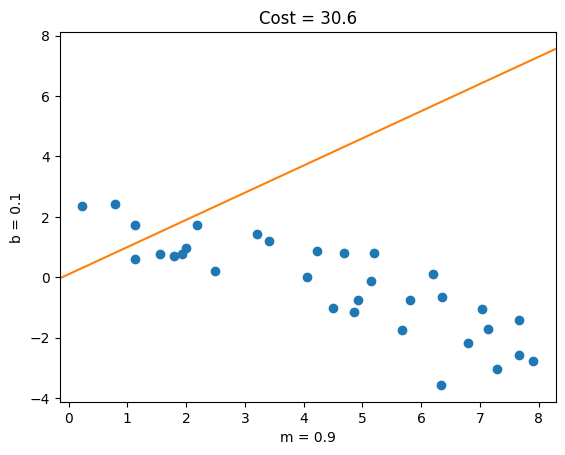

In [67]:
labeled_regression_plot(x[batch_indices], y[batch_indices], m, b, C, include_grad=False)

Step 3: Use autodiff to calculate gradient of $C$ w.r.t. parameters
Étape 3 : Utiliser la différentiation automatique (autodiff) pour calculer le gradient de $C$ par rapport aux paramètres.

In [68]:
C.backward()

In [69]:
m.grad

tensor([53.4475])

In [70]:
b.grad

tensor([8.5877])

The gradient of cost, $\nabla{C}$, is

Le gradient du coût, $\nabla{C}$, est

In [71]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 8.5877],
        [53.4475]])

The vector of parameters $\theta$ is:
Le vecteur de paramètres $\theta$ est :

In [72]:
theta = torch.tensor([[b, m]]).T 
theta

tensor([[0.1000],
        [0.9000]])

Step 4: Gradient descent
$$\theta'=\theta - \alpha \nabla{C}$$

In [73]:
lr = 0.01

In [74]:
new_theta = theta - lr*gradient
new_theta

tensor([[0.0141],
        [0.3655]])

That's it! Let's update the m and b variables and confirm the correspond to a lower cost $C$ 
:
C'est tout ! Mettons à jour les variables m et b et confirmons qu'elles correspondent à un coût $C$ plus bas :

In [75]:
b = new_theta[0]
m = new_theta[1]

In [76]:
C = mse(regression(x[batch_indices], m, b), y[batch_indices])
C

tensor(8.7904)

Rinse and Repeat; Rincez et répétez ;

In [77]:
b.requires_grad_()
_ = m.requires_grad_() 

Instead of looping through epochs, we'll loop through rounds of SGD:

Au lieu de parcourir les époques, nous allons parcourir les cycles de SGD :



In [78]:
rounds = 100 # Use additional rounds (e.g., 1000) for better fit (or use a "fancy" optimizer)
for r in range(rounds): 
    
    # This sampling step is slow; we'll cover much quicker batch sampling later: 
    batch_indices = np.random.choice(n, size=batch_size, replace=False)
    
    yhat = regression(x[batch_indices], m, b) # Step 1
    C = mse(yhat, y[batch_indices]) # Step 2
    
    C.backward() # Step 3
    
    if r % 10 == 0:
        print('Step {}, cost {}, m grad {}, b grad {}'.format(r, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))
    
    gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
    theta = torch.tensor([[b, m]]).T 
    
    new_theta = theta - lr*gradient # Step 4
    
    b = new_theta[0].requires_grad_()
    m = new_theta[1].requires_grad_()

Step 0, cost 8.31, m grad 27, b grad 4.04
Step 10, cost 1.85, m grad 3.36, b grad -0.397
Step 20, cost 1.54, m grad -2.39, b grad -1.15
Step 30, cost 2.32, m grad 0.31, b grad -1.26
Step 40, cost 2.11, m grad 0.0417, b grad -0.813
Step 50, cost 1.15, m grad -1.25, b grad -0.779
Step 60, cost 1.24, m grad -0.288, b grad -0.487
Step 70, cost 1.66, m grad 0.536, b grad -0.412
Step 80, cost 1.56, m grad -0.425, b grad -0.644
Step 90, cost 1.52, m grad 1.38, b grad -0.266


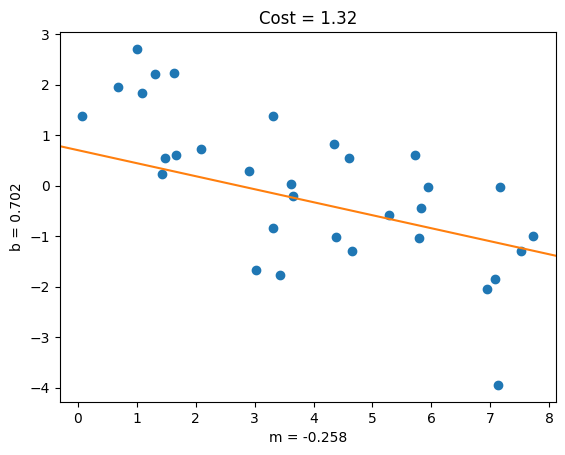

In [79]:
labeled_regression_plot(x[batch_indices], y[batch_indices], m, b, C, include_grad=False)

Since we have so many data points and we were sampling without replacement throughout this notebook, we can use our initial indices sample as model validation data:

Étant donné que nous avons tellement de points de données et que nous avons échantillonné sans remplacement tout au long de ce cahier, nous pouvons utiliser notre échantillon initial d'indices comme données de validation du modèle :

In [80]:
validation_cost = mse(regression(x[indices], m, b), y[indices])

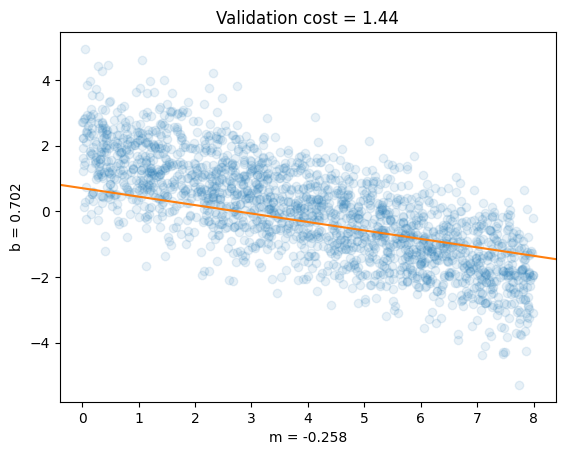

In [82]:
fig, ax = plt.subplots()

ax.scatter(x[indices], y[indices], alpha=0.1)

x_min, x_max = ax.get_xlim()
y_min = regression(x_min, m, b).detach().numpy()
y_max = regression(x_max, m, b).detach().numpy()

plt.title('Validation cost = {}'.format('%.3g' % validation_cost.item()))
plt.ylabel('b = {}'.format('%.3g' % b.item()))
plt.xlabel('m = {}'.format('%.3g' % m.item()))

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

The model could fit the validation data better by being run for a thousand epochs instead of a hundred. However, using the batch-sampling method in this notebook is painfully slow. See the Learning Rate Scheduling notebook, which builds on what we've done here to both more efficiently sample batches and refine the learning rate, thereby resulting in a much better-fitting model in a small fraction of the time.

Le modèle pourrait mieux s'adapter aux données de validation en étant exécuté pendant mille époques au lieu de cent. Cependant, l'utilisation de la méthode d'échantillonnage par lots dans ce cahier est extrêmement lente. Consultez le cahier sur la planification du taux d'apprentissage, qui s'appuie sur ce que nous avons fait ici pour échantillonner plus efficacement les lots et affiner le taux d'apprentissage, ce qui permet d'obtenir un modèle beaucoup mieux ajusté en une petite fraction du temps.

In [83]:
indices.shape

(2000,)